<a href="https://colab.research.google.com/github/ArianeMora/enzyme-tk/blob/main/Enzyme_tk_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example pipeline using Enzyme-tk



In [4]:
from google.colab import drive
drive.mount('/content/drive')
DATA_DIR = "/content/drive/MyDrive/shared_resources/enzymetk"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# We're going to search through an extremeophile dataset for potentially interesting enzymes for a specific reation

The dataset was developed as part of the enzyme-tk paper, and uses sequences from both SwissProt and UniProt with high annotation levels.

Proteins were selected from UniProt, using the online version: https://www.uniprot.org/

To this, we select proteins with existance at 1-2 (meaning there is experimental evidence in th gene expression level or the protein level).

Annotation 4 or 5 means the data has an annotation level of 4 or 5 (which is a high level of annotation). Both reviewed and unreviewed sequences were considered.

These were downloaded on the 10th of July 2025.

In [2]:
! ls /content/drive/MyDrive/shared_resources/enzymetk

Dataset1_extremophiles_annotation-4-5_esm3.pkl
Dataset1_extremophiles_protein_existance-1-2_esm3.pkl
enzymemap_v2_brenda2023.csv
enzymemap_v2_brenda2023_reactions.csv
protein.csv
uniprotkb_reviewed_true_2025_17_02.tsv


In [1]:
! pip install enzymetk==0.0.7
! pip install rdkit
! pip install fair-esm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.6/36.6 MB 63.1 MB/s eta 0:00:00


# First check for which enzymes might be able to do your reaction



In [21]:
from enzymetk.similarity_reaction_step import ReactionDist
from enzymetk.save_step import Save
import pandas as pd
import os

label = 'Monuron'
data_folder = '/content/drive/MyDrive/shared_resources/enzymetk/'

rxn_smiles = 'CCCCC(COC(C1=CC=CC=C1C(OCC(CCCC)CC)=O)=O)CC>>CCCCC(CC)COC(=O)C1=CC=CC=C1C(=O)[O-]'

reaction_df = pd.read_csv(os.path.join(data_folder, f'enzymemap_v2_brenda2023_reactions.csv'))

id_col = 'id'
output_dir = 'output/'
reaction_col = 'unmapped'
reactions = (reaction_df << (ReactionDist(id_col, reaction_col, rxn_smiles) >> Save(f'reaction_similarity_Monuron.pkl')))
reactions

100%|██████████| 62896/62896 [01:11<00:00, 881.01it/s]


,id,QuerySmiles,unmapped,TanimotoSimilarity,RusselSimilarity,CosineSimilarity
0,3.1.3.12_207073,CCCCC(COC(C1=CC=CC=C1C(OCC(CCCC)CC)=O)=O)CC>>C...,O.O=P(O)(O)OC[C@H]1O[C@H](O[C@H]2O[C@H](CO)[C@...,0.207063,0.062988,0.343729
1,3.1.1.81_202567,CCCCC(COC(C1=CC=CC=C1C(OCC(CCCC)CC)=O)=O)CC>>C...,CCCCCC(=O)N[C@H]1CCOC1=O.O>>CCCCCC(=O)N[C@@H](...,0.242489,0.055176,0.421654
2,3.1.1.81_202652,CCCCC(COC(C1=CC=CC=C1C(OCC(CCCC)CC)=O)=O)CC>>C...,CCCC(=O)N[C@H]1CCOC1=O.O>>CCCC(=O)N[C@@H](CCO)...,0.177243,0.039551,0.343947
3,3.1.1.81_202609,CCCCC(COC(C1=CC=CC=C1C(OCC(CCCC)CC)=O)=O)CC>>C...,CCCCCC(=O)N[C@@H](CCO)C(=O)O>>CCCCCC(=O)N[C@H]...,0.216387,0.050293,0.384339
4,3.1.1.81_202339,CCCCC(COC(C1=CC=CC=C1C(OCC(CCCC)CC)=O)=O)CC>>C...,CCCCCCCCCC(=O)CC(=O)N[C@H]1CCOC1=O.O>>CCCCCCCC...,0.344322,0.091797,0.514220
...,...,...,...,...,...,...
62891,2.3.2.5_126075,CCCCC(COC(C1=CC=CC=C1C(OCC(CCCC)CC)=O)=O)CC>>C...,NC(=O)CC[C@H](N)C(=O)N[C@@H](Cc1ccc(O)cc1)C(=O...,0.276740,0.079590,0.434324
62892,2.3.2.5_126074,CCCCC(COC(C1=CC=CC=C1C(OCC(CCCC)CC)=O)=O)CC>>C...,NC(=O)CC[C@H](N)C(=O)N[C@@H](Cc1cnc[nH]1)C(=O)...,0.307471,0.104492,0.473933
62893,2.3.2.5_126069,CCCCC(COC(C1=CC=CC=C1C(OCC(CCCC)CC)=O)=O)CC>>C...,Cc1c(NC(=O)[C@@H](N)CCC(N)=O)c(=O)oc2ccccc12>>...,0.290378,0.082520,0.450951
62894,2.3.2.5_126074,CCCCC(COC(C1=CC=CC=C1C(OCC(CCCC)CC)=O)=O)CC>>C...,NC(=O)CC[C@H](N)C(=O)N[C@@H](Cc1cnc[nH]1)C(=O)...,0.307471,0.104492,0.473933


## Look at the most simliar reactions

In [22]:
top_substrate_distance_df = reactions.sort_values('TanimotoSimilarity', ascending=False)
top_substrate_distance_df

,id,QuerySmiles,unmapped,TanimotoSimilarity,RusselSimilarity,CosineSimilarity
27361,3.1.1.60_199687,CCCCC(COC(C1=CC=CC=C1C(OCC(CCCC)CC)=O)=O)CC>>C...,CCCCC(CC)COC(=O)c1ccccc1C(=O)OCC(CC)CCCC.O>>CC...,0.985185,0.194824,0.992565
27430,3.1.1.60_199703,CCCCC(COC(C1=CC=CC=C1C(OCC(CCCC)CC)=O)=O)CC>>C...,CCCCCOC(=O)c1ccccc1C(=O)OCCCCC.O>>CCCCCO.CCCCC...,0.646489,0.130371,0.797392
27431,3.1.1.60_199704,CCCCC(COC(C1=CC=CC=C1C(OCC(CCCC)CC)=O)=O)CC>>C...,CCCCOC(=O)c1ccccc1C(=O)OCCCC.O>>CCCCO.CCCCOC(=...,0.573171,0.114746,0.750091
28996,3.1.1.74_201379,CCCCC(COC(C1=CC=CC=C1C(OCC(CCCC)CC)=O)=O)CC>>C...,CCCOC(=O)c1ccccc1C(=O)OCCC.O>>CCCO.CCCOC(=O)c1...,0.465394,0.095215,0.665777
2714,3.1.1.1_193645,CCCCC(COC(C1=CC=CC=C1C(OCC(CCCC)CC)=O)=O)CC>>C...,CCCCCC(=O)O[C@H](CNC(C)C)COc1cccc2ccccc12.O>>C...,0.456929,0.119141,0.627457
...,...,...,...,...,...,...
10186,1.4.3.21_85440,CCCCC(COC(C1=CC=CC=C1C(OCC(CCCC)CC)=O)=O)CC>>C...,CN.O.O=O>>C=O.N.OO,0.002488,0.000488,0.025031
19917,4.2.1.112_287249,CCCCC(COC(C1=CC=CC=C1C(OCC(CCCC)CC)=O)=O)CC>>C...,C#C.O>>CC=O,0.002488,0.000488,0.025031
12837,3.8.1.5_274359,CCCCC(COC(C1=CC=CC=C1C(OCC(CCCC)CC)=O)=O)CC>>C...,ClCCl.O>>Cl.OCCl,0.002475,0.000488,0.020438
44964,1.12.98.4_38800,CCCCC(COC(C1=CC=CC=C1C(OCC(CCCC)CC)=O)=O)CC>>C...,S>>S,0.000000,0.000000,0.000000


## Visualize the reactions


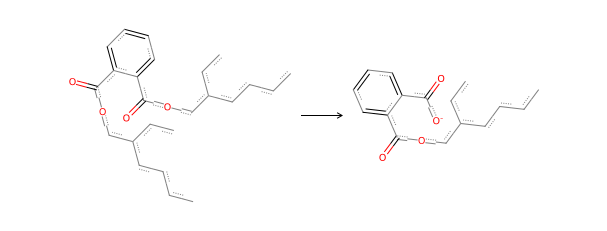

In [23]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import Draw
from rdkit.Chem import rdChemReactions
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
from rdkit.Chem.Draw import rdMolDraw2D, rdDepictor
import rdkit


rxn = rdChemReactions.ReactionFromSmarts(rxn_smiles)
drawer = rdMolDraw2D.MolDraw2DSVG(-1,-1)
dopts = drawer.drawOptions()
dopts.bondLineWidth = 1.0 # default is 2.0
drawer.DrawReaction(rxn)
drawer.FinishDrawing()
import IPython.display
i = IPython.display.SVG(drawer.GetDrawingText())
display(i)

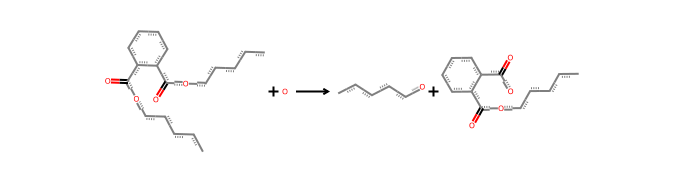

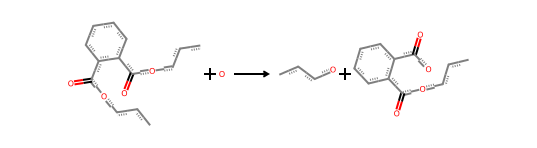

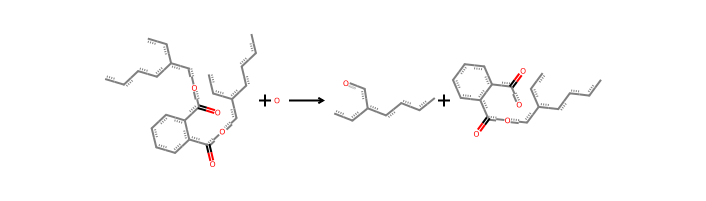

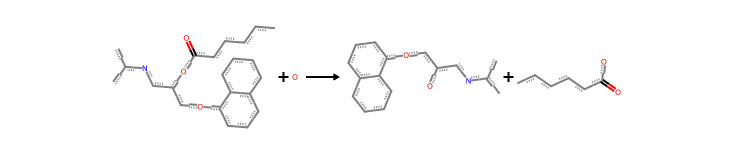

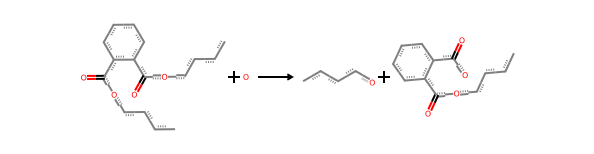

In [24]:
import IPython.display

names = []
smiles_to_name = {}
ms = []
top_df = top_substrate_distance_df.head(5)

for c in set(top_df['unmapped'].values):
    rxn = rdChemReactions.ReactionFromSmarts(c)
    drawer = rdMolDraw2D.MolDraw2DSVG(-1,-1)
    dopts = drawer.drawOptions()
    dopts.addAtomIndices = False  # This is the key line
    dopts.bondLineWidth = 2.0 # default is 2.0
    drawer.DrawReaction(rxn)
    drawer.FinishDrawing()
    i = IPython.display.SVG(drawer.GetDrawingText())
    display(i)

# Do the same thing with chemBERTa to compare the reaction embedding vs tanimoto

In [25]:
from enzymetk.embedchem_chemberta_step import ChemBERT

reaction_col = 'unmapped'
top_substrate_distance_df = top_substrate_distance_df.head(10) << (ChemBERT(id_col, reaction_col, 1) >> Save(f'top_substrate_distance_df_chemberta.pkl'))
print(top_substrate_distance_df)

CCCCC(CC)COC(=O)c1ccccc1C(=O)OCC(CC)CCCC.O>>CCCCC(CC)CO.CCCCC(CC)COC(=O)c1ccccc1C(=O)O
CCCCCOC(=O)c1ccccc1C(=O)OCCCCC.O>>CCCCCO.CCCCCOC(=O)c1ccccc1C(=O)O
CCCCOC(=O)c1ccccc1C(=O)OCCCC.O>>CCCCO.CCCCOC(=O)c1ccccc1C(=O)O
CCCOC(=O)c1ccccc1C(=O)OCCC.O>>CCCO.CCCOC(=O)c1ccccc1C(=O)O
CCCCCC(=O)O[C@H](CNC(C)C)COc1cccc2ccccc12.O>>CC(C)NC[C@@H](O)COc1cccc2ccccc12.CCCCCC(=O)O
CCCCCC(=O)O[C@@H](CNC(C)C)COc1cccc2ccccc12.O>>CC(C)NC[C@H](O)COc1cccc2ccccc12.CCCCCC(=O)O
CCCCCC(=O)OCC(COC(=O)CCCCC)OC(=O)CCCCC.O>>CCCCCC(=O)O.CCCCCC(=O)OCC(CO)OC(=O)CCCCC
CCCCCC(=O)OCC(COC(=O)CCCCC)OC(=O)CCCCC.O>>CCCCCC(=O)O.CCCCCC(=O)OCC(CO)OC(=O)CCCCC
CCCCCC(=O)OCC(COC(=O)CCCCC)OC(=O)CCCCC.O>>CCCCCC(=O)O.CCCCCC(=O)OCC(CO)OC(=O)CCCCC
CCCCCC(=O)OC[C@H](COP(=O)(O)OC[C@H](N)C(=O)O)OC(=O)CCCCC.O>>CCCCCC(=O)OC[C@H](CO)OC(=O)CCCCC.N[C@@H](COP(=O)(O)O)C(=O)O
                    id                                        QuerySmiles  \
27361  3.1.1.60_199687  CCCCC(COC(C1=CC=CC=C1C(OCC(CCCC)CC)=O)=O)CC>>C...   
27430  3.1.1.60_19970

/usr/local/lib/python3.12/dist-packages/enzymetk/embedchem_chemberta_step.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chemberta'] = [r[1] for r in results]


In [29]:
top_substrate_distance_df

,id,QuerySmiles,unmapped,TanimotoSimilarity,RusselSimilarity,CosineSimilarity,chemberta
27361,3.1.1.60_199687,CCCCC(COC(C1=CC=CC=C1C(OCC(CCCC)CC)=O)=O)CC>>C...,CCCCC(CC)COC(=O)c1ccccc1C(=O)OCC(CC)CCCC.O>>CC...,0.985185,0.194824,0.992565,"[0.27495342, -0.84084105, -1.4218831, -1.42625..."
27430,3.1.1.60_199703,CCCCC(COC(C1=CC=CC=C1C(OCC(CCCC)CC)=O)=O)CC>>C...,CCCCCOC(=O)c1ccccc1C(=O)OCCCCC.O>>CCCCCO.CCCCC...,0.646489,0.130371,0.797392,"[0.07243191, -0.6398928, -0.7461116, -0.839354..."
27431,3.1.1.60_199704,CCCCC(COC(C1=CC=CC=C1C(OCC(CCCC)CC)=O)=O)CC>>C...,CCCCOC(=O)c1ccccc1C(=O)OCCCC.O>>CCCCO.CCCCOC(=...,0.573171,0.114746,0.750091,"[0.14108197, -0.5778002, -0.8227744, -0.930462..."
28996,3.1.1.74_201379,CCCCC(COC(C1=CC=CC=C1C(OCC(CCCC)CC)=O)=O)CC>>C...,CCCOC(=O)c1ccccc1C(=O)OCCC.O>>CCCO.CCCOC(=O)c1...,0.465394,0.095215,0.665777,"[0.7285566, -0.54892915, -0.42621252, -0.84840..."
2714,3.1.1.1_193645,CCCCC(COC(C1=CC=CC=C1C(OCC(CCCC)CC)=O)=O)CC>>C...,CCCCCC(=O)O[C@H](CNC(C)C)COc1cccc2ccccc12.O>>C...,0.456929,0.119141,0.627457,"[1.7984216, -0.081946224, -1.7392011, 0.463935..."
2721,3.1.1.1_193657,CCCCC(COC(C1=CC=CC=C1C(OCC(CCCC)CC)=O)=O)CC>>C...,CCCCCC(=O)O[C@@H](CNC(C)C)COc1cccc2ccccc12.O>>...,0.456929,0.119141,0.627457,"[2.033545, 0.22045185, -1.6756855, 0.7385629, ..."
23135,3.1.1.79_201847,CCCCC(COC(C1=CC=CC=C1C(OCC(CCCC)CC)=O)=O)CC>>C...,CCCCCC(=O)OCC(COC(=O)CCCCC)OC(=O)CCCCC.O>>CCCC...,0.446184,0.111328,0.619026,"[-0.3288489, -1.3655471, -0.54613537, -0.65436..."
56330,3.1.1.1_192467,CCCCC(COC(C1=CC=CC=C1C(OCC(CCCC)CC)=O)=O)CC>>C...,CCCCCC(=O)OCC(COC(=O)CCCCC)OC(=O)CCCCC.O>>CCCC...,0.446184,0.111328,0.619026,"[-0.3288489, -1.3655471, -0.54613537, -0.65436..."
16411,3.1.1.3_197173,CCCCC(COC(C1=CC=CC=C1C(OCC(CCCC)CC)=O)=O)CC>>C...,CCCCCC(=O)OCC(COC(=O)CCCCC)OC(=O)CCCCC.O>>CCCC...,0.446184,0.111328,0.619026,"[-0.3288489, -1.3655471, -0.54613537, -0.65436..."
11185,3.1.4.3_214408,CCCCC(COC(C1=CC=CC=C1C(OCC(CCCC)CC)=O)=O)CC>>C...,CCCCCC(=O)OC[C@H](COP(=O)(O)OC[C@H](N)C(=O)O)O...,0.442244,0.130859,0.615604,"[0.7983923, -0.057661336, -1.5614904, -0.71288..."


In [ ]:
# Next we want to combine with our protein dataset


In [26]:
import pandas as pd

df = pd.concat([pd.read_pickle('/content/drive/MyDrive/shared_resources/enzymetk/Dataset1_extremophiles_protein_existance-1-2_esm3.pkl'),
                           pd.read_pickle('/content/drive/MyDrive/shared_resources/enzymetk/Dataset1_extremophiles_annotation-4-5_esm3.pkl')])
print(len(df))
df

8793


,Entry,Reviewed,Entry Name,Protein names,Gene Names,Organism,Length,Taxonomic lineage (Ids),Organism (ID),Sequence,...,class,order,family,genus,species,domain,superkingdom_label,esm3_mean,Annotation,Topological domain
0,A0A0A7GEY4,reviewed,GGPPS_GEOAI,Geranylgeranyl pyrophosphate synthase (GGPP sy...,GACE_1337,Geoglobus acetivorans,319,"131567 (no rank), 2157 (domain), 3366610 (king...",565033,MISEIIKDRAKLVNEKIEELLKEQEPEGLYRAARHYLKAGGKRLRP...,...,183980.0,2231.0,2232.0,190818.0,NaN,2157,Archaea,"[41.54556, 39.569508, -19.955704, -44.13717, 3...",NaN,NaN
1,A0A0E3KBH3,reviewed,OFOB_SACSO,2-oxoacid:ferredoxin oxidoreductase subunit be...,SSOP1_2914 SULA_0624 SULB_0626 SULC_0624,Saccharolobus solfataricus (Sulfolobus solfata...,305,"131567 (no rank), 2157 (domain), 1783275 (king...",2287,MAGLKVEWNDWCPGCGNFGILSAEQQAIQELGLDPKKVVLVSGIGC...,...,183924.0,2281.0,118883.0,2100760.0,NaN,2157,Archaea,"[12.561176, 29.486664, 22.686277, 35.291122, 1...",NaN,NaN
2,A2BIX4,reviewed,SPEE1_HYPBU,Polyamine aminopropyltransferase 1 (Caldopenta...,speE1 Hbut_0057,Hyperthermus butylicus (strain DSM 5456 / JCM ...,292,"131567 (no rank), 2157 (domain), 1783275 (king...",415426,MELGMFRLNIYQPGGPIGALYPVEKILYHGRSQYQEIMILVLRGFG...,...,183924.0,114380.0,2307.0,54247.0,54248.0,2157,Archaea,"[40.871384, -14.312287, 17.669962, -15.521046,...",NaN,NaN
3,A3MTK6,reviewed,CAS4_PYRCJ,CRISPR-associated exonuclease Cas4 (EC 3.1.12.1),cas4 Pcal_0546,Pyrobaculum calidifontis (strain DSM 21063 / J...,213,"131567 (no rank), 2157 (domain), 1783275 (king...",410359,MELLSPKPLCSVVNCEDLEKLDHVSALNELRREQEIFKLLPGIYAH...,...,183924.0,2266.0,2267.0,2276.0,181486.0,2157,Archaea,"[53.176453, 7.828779, 30.162935, 42.848545, 7....",NaN,NaN
4,A3MTR6,reviewed,PGMI_PYRCJ,Bifunctional phosphoglucose/phosphomannose iso...,Pcal_0606,Pyrobaculum calidifontis (strain DSM 21063 / J...,299,"131567 (no rank), 2157 (domain), 1783275 (king...",410359,MLNDYLQWEKFILRGVEFPTRYRVDGDEVEITPSSRLYVSGMGGSG...,...,183924.0,2266.0,2267.0,2276.0,181486.0,2157,Archaea,"[84.9294, -21.430025, 74.73619, 1.2272632, 43....",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4793,W9E9B0,unreviewed,W9E9B0_9THEO,dITP/XTP pyrophosphatase (EC 3.6.1.66) (Non-ca...,V518_2174,Thermoanaerobacterium aotearoense SCUT27,198,"131567 (no rank), 2 (domain), 1783272 (kingdom...",1421016,MKIVVASHNKYKVDEIREFFKGDYEVLSADDIGSYDEVEETGKTIE...,...,186801.0,68295.0,186814.0,28895.0,47490.0,2,Bacteria,"[38.243904, 46.33406, -49.22531, -6.325, 17.03...",4.0,NaN
4794,W9EBD0,unreviewed,W9EBD0_9THEO,Probable dual-specificity RNA methyltransferas...,rlmN V518_1330,Thermoanaerobacterium aotearoense SCUT27,343,"131567 (no rank), 2 (domain), 1783272 (kingdom...",1421016,MIDLKNMTIEELEKFFLDIGETKYRAKQVFRWIYRGIVDFDDMTDL...,...,186801.0,68295.0,186814.0,28895.0,47490.0,2,Bacteria,"[45.29955, 52.314358, -53.883698, 10.689312, 1...",4.0,NaN
4795,W9EBT9,unreviewed,W9EBT9_9THEO,Aspartate-semialdehyde dehydrogenase (ASA dehy...,asd V518_1553,Thermoanaerobacterium aotearoense SCUT27,327,"131567 (no rank), 2 (domain), 1783272 (kingdom...",1421016,MGVNVAIVGATGLVGRTFIKVLEERNFPVDNLYLFASKRTAGQKLT...,...,186801.0,68295.0,186814.0,28895.0,47490.0,2,Bacteria,"[21.4233, -31.31244, 22.62557, 49.62804, 27.95...",4.0,NaN
4796,W9EEL2,unreviewed,W9EEL2_9THEO,Riboflavin biosynthesis protein RibD [Includes...,V518_0117,Thermoanaerobacterium aotearoense SCUT27,360,"131567 (no rank), 2 (domain), 1783272 (kingdom...",1421016,MEKYMKRALQLAKLGVGHTNPNPLVGAVIVKDGRIIGEGYHEYYGG...,...,186801.0,68295.0,186814.0,28895.0,47490.0,2,Bacteria,"[1.3903661, -25.211025, 9.17412, 30.254318, -6...",4.0,NaN


In [27]:
from tqdm import tqdm
from ast import literal_eval

ec_grps = reaction_df.groupby('ec_num')['unmapped'].apply(list).reset_index(name='unmapped')
ec_to_reaction = dict(zip(ec_grps['ec_num'].values, ec_grps['unmapped'].values))
ec_dict = ec_to_reaction

rows = []
substrate_rows = []
for entry, seq, ecs in tqdm(df[['Entry', 'Sequence', 'EC number']].values):
    if isinstance(ecs, str):
      ecs = ecs.split('|')
      count_pos = 0
      for ec in ecs:
          if ec_dict.get(ec):
              reactions = ec_dict.get(ec)
              for reaction in reactions:
                  rows.append([entry, ec, reaction])
top_df = pd.DataFrame(rows, columns=['Entry', 'EC number', 'Reaction'])

# Get the top ones
top_substrates = top_substrate_distance_df['unmapped'].values
top_df = top_df[top_df['Reaction'].isin(top_substrates)]
top_df

100%|██████████| 8793/8793 [00:00<00:00, 22102.31it/s]


,Entry,EC number,Reaction
9987,Q5NU42,3.1.1.1,CCCCCC(=O)O[C@H](CNC(C)C)COc1cccc2ccccc12.O>>C...
9994,Q5NU42,3.1.1.1,CCCCCC(=O)O[C@@H](CNC(C)C)COc1cccc2ccccc12.O>>...
10274,Q5NU42,3.1.1.1,CCCCCC(=O)OCC(COC(=O)CCCCC)OC(=O)CCCCC.O>>CCCC...
10389,Q8NKS0,3.1.1.1,CCCCCC(=O)O[C@H](CNC(C)C)COc1cccc2ccccc12.O>>C...
10396,Q8NKS0,3.1.1.1,CCCCCC(=O)O[C@@H](CNC(C)C)COc1cccc2ccccc12.O>>...
10676,Q8NKS0,3.1.1.1,CCCCCC(=O)OCC(COC(=O)CCCCC)OC(=O)CCCCC.O>>CCCC...
10882,Q976W8,3.1.1.1,CCCCCC(=O)O[C@H](CNC(C)C)COc1cccc2ccccc12.O>>C...
10889,Q976W8,3.1.1.1,CCCCCC(=O)O[C@@H](CNC(C)C)COc1cccc2ccccc12.O>>...
11169,Q976W8,3.1.1.1,CCCCCC(=O)OCC(COC(=O)CCCCC)OC(=O)CCCCC.O>>CCCC...
18445,Q06174,3.1.1.1,CCCCCC(=O)O[C@H](CNC(C)C)COc1cccc2ccccc12.O>>C...


In [3]:
# Finally select those that come from bacteria for obvious reasons...
protein_all_info = df[df['Entry'].isin(top_df['Entry'].values)]

# 2157 or 2 (archaea or bacteria)
protein_all_info['superkingdom'] = [c.split(',')[1].split(' ')[1].strip() for c in protein_all_info['Taxonomic lineage (Ids)'].values]

print('Superkingdom')
print(protein_all_info['superkingdom'].value_counts())
protein_all_info = protein_all_info[protein_all_info['superkingdom'].isin(['2', '2157'])]

print('Cofactors')
print(protein_all_info['Cofactor'].value_counts())
protein_all_info = protein_all_info[protein_all_info['Cofactor'].isna()]

print('Subunits')
print(protein_all_info['Subunit structure'].value_counts())
protein_all_info['Subunit'] = ['Monomer or Homodimer' if (isinstance(s, (int, float, complex)) or 'Monomer' in s or 'Homodimer' in s) else 'Complex' for s in protein_all_info['Subunit structure'].values]
protein_all_info = protein_all_info[protein_all_info['Subunit'] == 'Monomer or Homodimer']

protein_all_info.to_csv(f'{label}_enzymes_based_on_substrates.csv')
protein_all_info

NameError: name 'df' is not defined

In [2]:
protein_all_info

NameError: name 'protein_all_info' is not defined

In [ ]:
# First work out which enzyme classes you're interested in

In [6]:
# Run esm2
! pip install fair-esm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 5.2 MB/s eta 0:00:00


In [7]:
! mkdir tmp

In [ ]:
from enzymetk.embedprotein_esm_step import EmbedESM
from enzymetk.save_step import Save

# Calculate the ESM2 embeddings
id_col = 'Entry'
seq_col = 'Sequence'
sub_df = df.sample(10)
sub_df = sub_df << (EmbedESM(id_col, seq_col, extraction_method='mean',
                     tmp_dir='tmp/', rep_num=36) >> Save('esm2_test_sub_df.pkl'))
sub_df

In [32]:
!pip install -q condacolab
import condacolab
condacolab.install() # expect a kernel restart
! conda install -c conda-forge -c bioconda mmseqs2 -y

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:09
🔁 Restarting kernel...
Channels:
 - conda-forge
 - bioconda
Platform: linux-64
Solving environment: | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - mmseqs2


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    aria2-1.37.0               |       hbc8128a_2         1.6 MB  conda-forge
    ca-certificates-2026.1.4   |       hbd8a1cb_0         143 KB  conda-forge
    certifi-2026.1.4           |     pyhd8ed1ab_0         147 KB  conda-forge
    conda-24.11.3              |  py311h38be061_0         1.1 MB  conda-forge
    gawk-5.3.1                 |       hcd3d067_0         1.1 MB  conda-forge
    gmp-6.3.0           

In [1]:
from enzymetk.similarity_mmseqs_step import MMseqs
from enzymetk.save_step import Save
import pandas as pd

id_col = 'Entry'
seq_col = 'Sequence'
clustered = protein_all_info << (MMseqs(id_col, seq_col, method='cluster', args=['--min-seq-id', '0.3', '-c', '0.8', '--cov-mode', '0']) >> Save(f'metagenomics_mmseqs_files.pkl'))
clustered_seqs = pd.read_pickle(f'metagenomics_mmseqs_files.pkl')
len(clustered_seqs['mmseqs_representative_cluster_seq'].value_counts())
cluster_centres = set(clustered_seqs['mmseqs_representative_cluster_seq'].value_counts().index)
clustered = protein_all_info[protein_all_info['Entry'].isin(cluster_centres)]

with open('sequences_to_order.fasta', 'w+') as fout:
    for entry, seq in clustered[['Entry', 'Sequence']].values:
        fout.write(f'>{entry}\n{seq}\n')

Boltz: Needs docko package. Install with: pip install docko.
Chai: Needs docko package. Install with: pip install docko.
Vina: Needs docko package. Install with: pip install docko.
EmbedESM3: Needs esm3 package. Install with: pip install esm.


NameError: name 'protein_all_info' is not defined